<a href="https://colab.research.google.com/github/pepesrz91/machine-learning-2021-mcc/blob/master/Tarea6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![imagen.png](https://i.imgur.com/d17FLgS.png)

José Juan Suárez Ramos<br>
A01224078<br>
Tarea 6 

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [2]:
# Cambiamos nombres de columnas por algo más concreto
# PAO = Patients age at operation
# YPO = Yar of patient's Operation
# NPAN = Number of Positive Auxiliary Nodes
# Survival { 1: Patient survived 5 years or longer. 2: Patient died within 5 years}
colnames = ["PAO", "YPO", "NPAN", "Survival"]

In [3]:

data =  pd.read_csv('/content/drive/MyDrive/Presentaciones/haberman.data', sep=",", names=colnames)
print(data)

     PAO  YPO  NPAN  Survival
0     30   64     1         1
1     30   62     3         1
2     30   65     0         1
3     31   59     2         1
4     31   65     4         1
..   ...  ...   ...       ...
301   75   62     1         1
302   76   67     0         1
303   77   65     3         1
304   78   65     1         2
305   83   58     2         2

[306 rows x 4 columns]


In [4]:
data.head()

,PAO,YPO,NPAN,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
print(data.dtypes)

PAO         int64
YPO         int64
NPAN        int64
Survival    int64
dtype: object


In [6]:
print(data.isna().sum())

PAO         0
YPO         0
NPAN        0
Survival    0
dtype: int64


(array([16., 27., 46., 53., 55., 41., 41., 18.,  7.,  2.]),
 array([30. , 35.3, 40.6, 45.9, 51.2, 56.5, 61.8, 67.1, 72.4, 77.7, 83. ]),
 <a list of 10 Patch objects>)

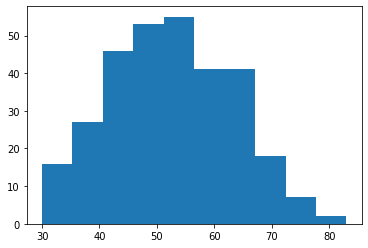

In [7]:
plt.hist(data["PAO"])

(array([63., 28., 26., 23., 30., 31., 28., 28., 25., 24.]),
 array([58. , 59.1, 60.2, 61.3, 62.4, 63.5, 64.6, 65.7, 66.8, 67.9, 69. ]),
 <a list of 10 Patch objects>)

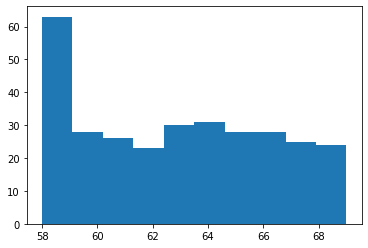

In [8]:
plt.hist(data["YPO"])

(array([236.,  30.,  18.,   8.,   9.,   2.,   1.,   0.,   1.,   1.]),
 array([ 0. ,  5.2, 10.4, 15.6, 20.8, 26. , 31.2, 36.4, 41.6, 46.8, 52. ]),
 <a list of 10 Patch objects>)

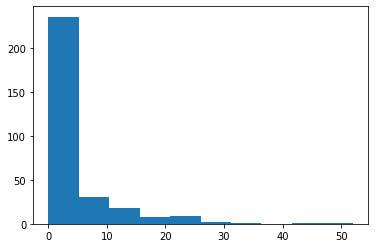

In [9]:
plt.hist(data["NPAN"])

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()

In [11]:

# data["YPO"] = minmax_scaling(data["YPO"], columns=[0])

(array([63., 28., 26., 23., 30., 31., 28., 28., 25., 24.]),
 array([58. , 59.1, 60.2, 61.3, 62.4, 63.5, 64.6, 65.7, 66.8, 67.9, 69. ]),
 <a list of 10 Patch objects>)

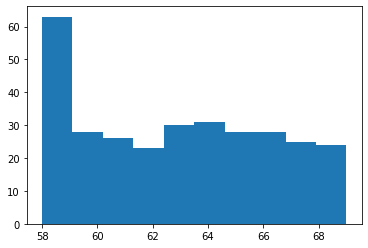

In [12]:
plt.hist(data["YPO"])

In [13]:
# data["NPAN"] = minmax_scaling(data["NPAN"], columns=[0])

(array([236.,  30.,  18.,   8.,   9.,   2.,   1.,   0.,   1.,   1.]),
 array([ 0. ,  5.2, 10.4, 15.6, 20.8, 26. , 31.2, 36.4, 41.6, 46.8, 52. ]),
 <a list of 10 Patch objects>)

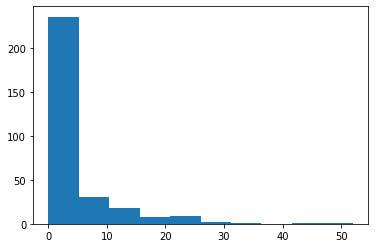

In [14]:
plt.hist(data["NPAN"])

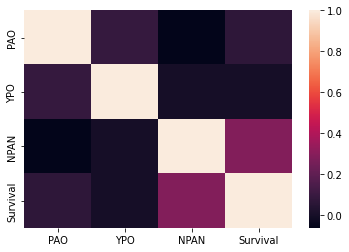

In [15]:
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [16]:
import statsmodels.api as sm
from sklearn.model_selection import KFold
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Cross validation configuration

In [17]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

cv = RepeatedStratifiedKFold(n_splits=7, n_repeats=5)
Y = data["Survival"]
X = data
X.drop("Survival", inplace=True, axis=1)

trainX, testX, trainY, testY = model_selection.train_test_split(X, Y, train_size=0.8, shuffle=True,  random_state=None)

# Logistic Regression

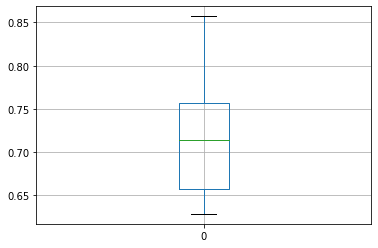

In [18]:
# LR

lr_model = LogisticRegression(class_weight="balanced")
lr_scores = cross_val_score(lr_model, trainX, trainY, scoring='accuracy', cv=cv)
pd.DataFrame(lr_scores).boxplot()


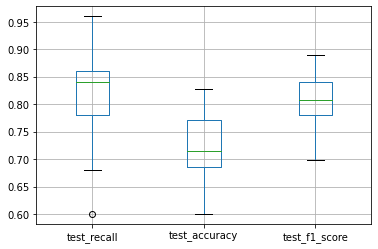

In [19]:
### LR 
lr_model = LogisticRegression(class_weight="balanced")

lr_multiple_scores = cross_validate(lr_model, trainX, trainY, scoring=scoring, cv=cv)
lr_complete_scores = pd.DataFrame(lr_multiple_scores)[ ["test_recall", "test_accuracy", "test_f1_score"]]

lr_complete_scores.boxplot()

# Logistic Regression Without Weights

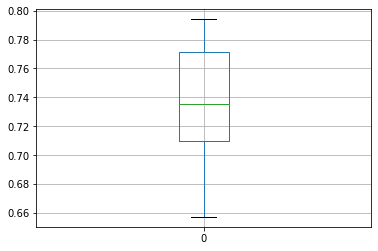

In [20]:
# LR no weigths
lr_model_no_w = LogisticRegression()
lr_no_w_scores = cross_val_score(lr_model_no_w, trainX, trainY, scoring='accuracy', cv=cv)
pd.DataFrame(lr_no_w_scores).boxplot()


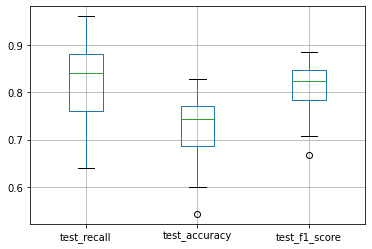

In [21]:
### LR no weights
lr_model_no_w = LogisticRegression(class_weight="balanced")

lr_no_weights_multiple_scores = cross_validate(lr_model_no_w, trainX, trainY, scoring=scoring, cv=cv)
lr_no_w_complete_scores = pd.DataFrame(lr_no_weights_multiple_scores)[ ["test_recall", "test_accuracy", "test_f1_score"]]

lr_no_w_complete_scores.boxplot()

# SVM

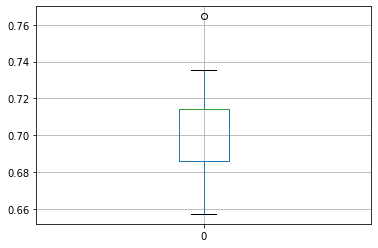

In [22]:
### SVM
svm_model = SVC()

svm_scores = cross_val_score(svm_model, trainX, trainY, scoring='accuracy', cv=cv)
pd.DataFrame(svm_scores).boxplot()

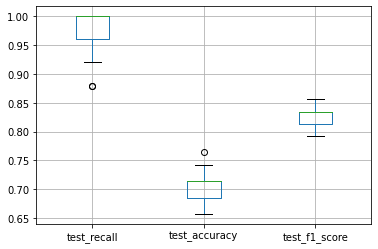

In [23]:
### SVM
svm_model = SVC()

svm_multiple_scores = cross_validate(svm_model, trainX, trainY, scoring=scoring, cv=cv)
svm_complete_scores = pd.DataFrame(svm_multiple_scores)[ ["test_recall", "test_accuracy", "test_f1_score"]]

svm_complete_scores.boxplot()

# MLP 

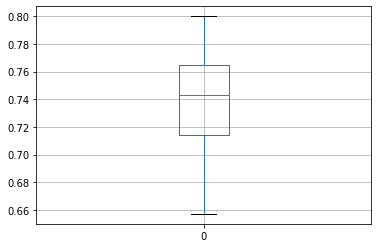

In [24]:
### MLP
mlp_model = MLPClassifier()
mlp_scores = cross_val_score(mlp_model, trainX, trainY, scoring='accuracy', cv=cv)
pd.DataFrame(mlp_scores).boxplot()

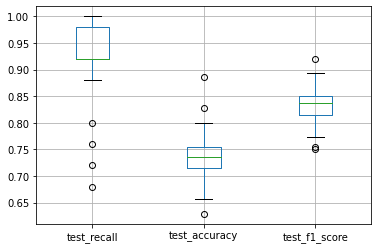

In [25]:
### MLP
mlp_model = MLPClassifier()

mlp_multiple_scores = cross_validate(mlp_model, trainX, trainY, scoring=scoring, cv=cv)
mlp_complete_scores = pd.DataFrame(mlp_multiple_scores)[ ["test_recall", "test_accuracy", "test_f1_score"]]

mlp_complete_scores.boxplot()

# KNN

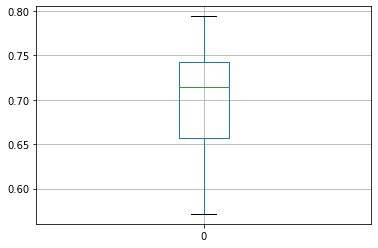

In [26]:
### KNN
knn_model = KNeighborsClassifier(weights='distance')
knn_scores = cross_val_score(knn_model, trainX, trainY, scoring='accuracy', cv=cv)
pd.DataFrame(knn_scores).boxplot()

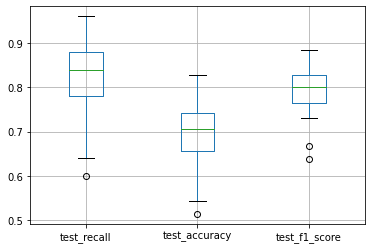

In [27]:
### KNN
knn_model = KNeighborsClassifier(weights='distance')
knn_multiple_scores = cross_validate(knn_model, trainX, trainY, scoring=scoring, cv=cv)
knn_complete_scores = pd.DataFrame(knn_multiple_scores)[ ["test_recall", "test_accuracy", "test_f1_score"]]

knn_complete_scores.boxplot()

# KNN no Weights

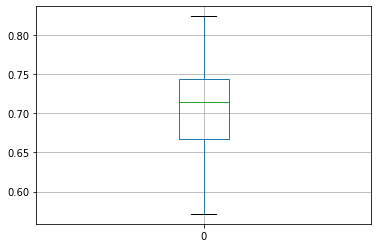

In [28]:
### KNN no weights
knn_model_no_weights = KNeighborsClassifier(weights='distance')
knn_no_weigths_scores = cross_val_score(knn_model_no_weights, trainX, trainY, scoring='accuracy', cv=cv)
pd.DataFrame(knn_no_weigths_scores).boxplot()

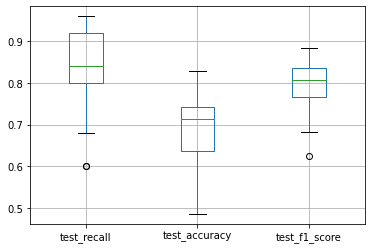

In [29]:
### KNN no weights
knn_model_no_weights = KNeighborsClassifier(weights='distance')
knn_no_weights_multiple_scores = cross_validate(knn_model_no_weights, trainX, trainY, scoring=scoring, cv=cv)
knn_no_weights_complete_scores = pd.DataFrame(knn_no_weights_multiple_scores)[ ["test_recall", "test_accuracy", "test_f1_score"]]

knn_no_weights_complete_scores.boxplot()

# Resultados


## Regresión Logística

In [30]:
lr_model = LogisticRegression(class_weight="balanced").fit(trainX, trainY)
lr_predictions = lr_model.predict(testX)
print(accuracy_score(testY, lr_predictions))
print(confusion_matrix(testY, lr_predictions))
print(classification_report(testY, lr_predictions))

0.7580645161290323
[[43  7]
 [ 8  4]]
              precision    recall  f1-score   support

           1       0.84      0.86      0.85        50
           2       0.36      0.33      0.35        12

    accuracy                           0.76        62
   macro avg       0.60      0.60      0.60        62
weighted avg       0.75      0.76      0.75        62



## Regresión logística sin pesos

In [31]:
lr_model_no_wieight = LogisticRegression().fit(trainX, trainY)
lr_no_weights_predictions = lr_model_no_wieight.predict(testX)
print(accuracy_score(testY, lr_no_weights_predictions))
print(confusion_matrix(testY, lr_no_weights_predictions))
print(classification_report(testY, lr_no_weights_predictions))

0.7903225806451613
[[49  1]
 [12  0]]
              precision    recall  f1-score   support

           1       0.80      0.98      0.88        50
           2       0.00      0.00      0.00        12

    accuracy                           0.79        62
   macro avg       0.40      0.49      0.44        62
weighted avg       0.65      0.79      0.71        62



## SVM

In [32]:
svm = SVC().fit(trainX, trainY)
svm_predictions = svm.predict(testX)
print(accuracy_score(testY, svm_predictions))
print(confusion_matrix(testY, svm_predictions))
print(classification_report(testY, svm_predictions))

0.8064516129032258
[[50  0]
 [12  0]]
              precision    recall  f1-score   support

           1       0.81      1.00      0.89        50
           2       0.00      0.00      0.00        12

    accuracy                           0.81        62
   macro avg       0.40      0.50      0.45        62
weighted avg       0.65      0.81      0.72        62



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## MLP

In [33]:
mlp_model = MLPClassifier().fit(trainX, trainY)
mlp_predictions = mlp_model.predict(testX)
print(accuracy_score(testY, mlp_predictions))
print(confusion_matrix(testY, mlp_predictions))
print(classification_report(testY, mlp_predictions))

0.8225806451612904
[[48  2]
 [ 9  3]]
              precision    recall  f1-score   support

           1       0.84      0.96      0.90        50
           2       0.60      0.25      0.35        12

    accuracy                           0.82        62
   macro avg       0.72      0.60      0.63        62
weighted avg       0.80      0.82      0.79        62



## KNN

In [34]:
knn = KNeighborsClassifier(weights='distance').fit(trainX, trainY)
knn_predictions = knn.predict(testX)
print(accuracy_score(testY, knn_predictions))
print(confusion_matrix(testY, knn_predictions))
print(classification_report(testY, knn_predictions))

0.6612903225806451
[[37 13]
 [ 8  4]]
              precision    recall  f1-score   support

           1       0.82      0.74      0.78        50
           2       0.24      0.33      0.28        12

    accuracy                           0.66        62
   macro avg       0.53      0.54      0.53        62
weighted avg       0.71      0.66      0.68        62



## KNN no weights

In [35]:
knn_no_weigths = KNeighborsClassifier().fit(trainX, trainY)
knn_no_weigths_predictions = knn_no_weigths.predict(testX)
print(accuracy_score(testY, knn_no_weigths_predictions))
print(confusion_matrix(testY, knn_no_weigths_predictions))
print(classification_report(testY, knn_no_weigths_predictions))

0.6774193548387096
[[39 11]
 [ 9  3]]
              precision    recall  f1-score   support

           1       0.81      0.78      0.80        50
           2       0.21      0.25      0.23        12

    accuracy                           0.68        62
   macro avg       0.51      0.52      0.51        62
weighted avg       0.70      0.68      0.69        62



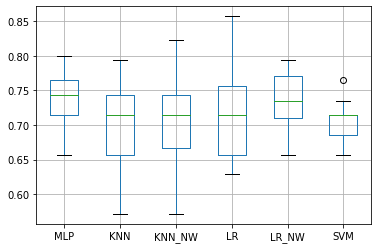

In [36]:

colnames = ["MLP", 'KNN',"KNN_NW", 'LR', 'LR_NW', 'SVM']

accuracy_scores = pd.DataFrame([mlp_scores, knn_scores, knn_no_weigths_scores, lr_scores,lr_no_w_scores, svm_scores]).transpose()
accuracy_scores.columns = colnames
accuracy_scores.head()
accuracy_scores.boxplot()

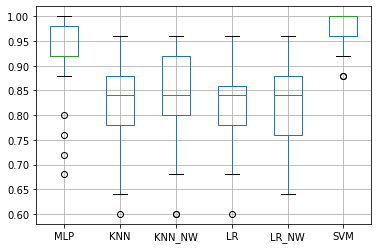

In [42]:
fig, ax = plt.subplots()
colnames = ["MLP", 'KNN', 'KNN_NW', 'LR','LR_NW', 'SVM']

complete_accuracy_scores = pd.DataFrame([mlp_complete_scores["test_recall"], knn_complete_scores["test_recall"], 
                                knn_no_weights_complete_scores["test_recall"], lr_complete_scores["test_recall"], 
                                lr_no_w_complete_scores["test_recall"],
                                svm_complete_scores["test_recall"]]).transpose()

complete_accuracy_scores.head()
complete_accuracy_scores.columns = colnames

complete_accuracy_scores.boxplot()

# Conclusiones

Todos los modelos muestran buenos resultados de precisión, los que más constantes son y mejor pronostican el caso 2 (cuando las personas mueren en durante 5 años) el mejor modelo que tenemos en este caso es el KNN ya que pronostica muy bien los casos 1 y 2 y su recall es constante y bueno (muy cerca de 1). 

El KNN sin pesos es un poco menos eficiente que el KNN con pesos y los datos de precisión así como de recall tienen una rango más amplio de resultados. 

La regresión logística sería nuestro segundo mejor modelos, cerca del MLP. Lo bueno que tiene la regresió logística es que 
El peor modelos en este caso es el SVC, ya que no es bueno pronosticando la clase número 2. 

